## Ice-Cream Sales Prediction Using SVR

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import Dataset into Notebook

In [2]:
dataset = pd.read_csv('/kaggle/input/polynomial-regression/Ice_cream selling data.csv')
X = dataset['Temperature (°C)'].values
y = dataset['Ice Cream Sales (units)'].values

## Checking Missing Data 

In [3]:
dataset.isnull().sum()

Temperature (°C)           0
Ice Cream Sales (units)    0
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 912.0 bytes


## Ploting Graph for Checking Linear/Non-Linear 

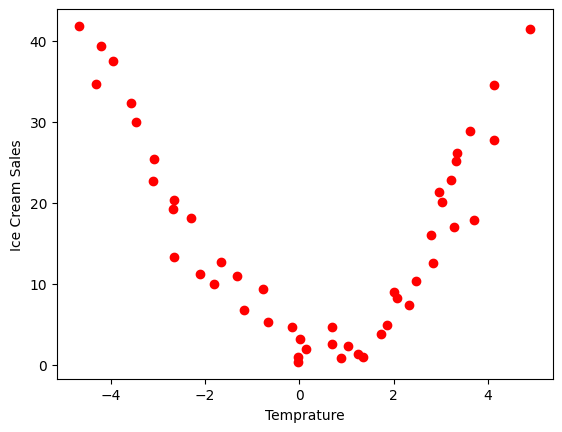

In [5]:
plt.scatter(X,y,color='red')
plt.xlabel("Temprature")
plt.ylabel('Ice Cream Sales')
plt.show()

In [6]:
#Since Scatter points form non linear relationship we are going to use Support Vector Regression 

In [7]:
print("X - \n",X)
print("y - \n",y)

X - 
 [-4.66226268 -4.31655945 -4.21398476 -3.94966109 -3.57855372 -3.4557117
 -3.10844012 -3.08130332 -2.67246083 -2.65228679 -2.65149803 -2.288264
 -2.11186969 -1.81893761 -1.66034773 -1.32637898 -1.17312327 -0.77333004
 -0.6737528  -0.14963487 -0.0361565  -0.03389529  0.0086077   0.14924457
  0.68878091  0.69359887  0.87490503  1.02418081  1.24071162  1.35981267
  1.74000001  1.85055193  1.99931037  2.0751006   2.31859124  2.471946
  2.78483646  2.83176021  2.95993209  3.02087431  3.21136614  3.27004407
  3.31607252  3.33593241  3.61077848  3.70405744  4.13086796  4.13353379
  4.89903151]
y - 
 [41.84298632 34.66111954 39.38300088 37.53984488 32.28453119 30.00113848
 22.63540128 25.36502221 19.22697005 20.27967918 13.2758285  18.12399121
 11.21829447 10.01286785 12.61518115 10.95773134  6.68912264  9.39296866
  5.21016262  4.67364254  0.32862552  0.89760319  3.16560001  1.93141603
  2.57678224  4.62568946  0.78997365  2.31380636  1.29236081  0.95311531
  3.78257014  4.8579878   8.94

In [8]:
## setting X and y to 2D array
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)

## Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()

X_scaled = sc_X.fit_transform(X)
y_scaled = sc_Y.fit_transform(y)


In [10]:
X_scaled

array([[-1.8479452 ],
       [-1.71846845],
       [-1.680051  ],
       [-1.58105345],
       [-1.44206205],
       [-1.39605385],
       [-1.26598971],
       [-1.25582612],
       [-1.10270173],
       [-1.09514592],
       [-1.0948505 ],
       [-0.95880791],
       [-0.89274269],
       [-0.7830304 ],
       [-0.72363349],
       [-0.59855168],
       [-0.54115259],
       [-0.39141743],
       [-0.35412262],
       [-0.15782394],
       [-0.11532272],
       [-0.11447582],
       [-0.09855712],
       [-0.04588418],
       [ 0.15618917],
       [ 0.15799365],
       [ 0.22589852],
       [ 0.281807  ],
       [ 0.36290461],
       [ 0.40751171],
       [ 0.54990384],
       [ 0.59130901],
       [ 0.64702374],
       [ 0.67540956],
       [ 0.76660448],
       [ 0.82404067],
       [ 0.941228  ],
       [ 0.95880242],
       [ 1.00680683],
       [ 1.02963161],
       [ 1.1009768 ],
       [ 1.12295353],
       [ 1.14019264],
       [ 1.14763079],
       [ 1.2505693 ],
       [ 1

In [11]:
y_scaled

array([[ 2.13674266],
       [ 1.54510138],
       [ 1.93408937],
       [ 1.78225041],
       [ 1.34931834],
       [ 1.16121274],
       [ 0.55442424],
       [ 0.77929007],
       [ 0.27363811],
       [ 0.36036015],
       [-0.21661617],
       [ 0.18277485],
       [-0.38611557],
       [-0.48541846],
       [-0.27104022],
       [-0.40758072],
       [-0.75922817],
       [-0.53648567],
       [-0.8810647 ],
       [-0.92526316],
       [-1.28320511],
       [-1.2363328 ],
       [-1.04949551],
       [-1.15116743],
       [-1.09800224],
       [-0.92921353],
       [-1.24519931],
       [-1.11966616],
       [-1.20381272],
       [-1.23175972],
       [-0.99866959],
       [-0.91007682],
       [-0.57348622],
       [-0.63717313],
       [-0.69966987],
       [-0.45874692],
       [ 0.00752228],
       [-0.27490744],
       [ 0.44794945],
       [ 0.34674559],
       [ 0.57123008],
       [ 0.08880311],
       [ 0.7609243 ],
       [ 0.84022796],
       [ 1.07150513],
       [ 0

## Training the SVR model on the whole dataset

In [12]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_scaled,y_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [13]:
y_scaled_res = regressor.predict(sc_X.transform([[4.130867961260749]])).reshape(-1,1)
sc_Y.inverse_transform(y_scaled_res)

array([[32.33083939]])

## Visualising the SVR results for Ice Cream vs Temprature

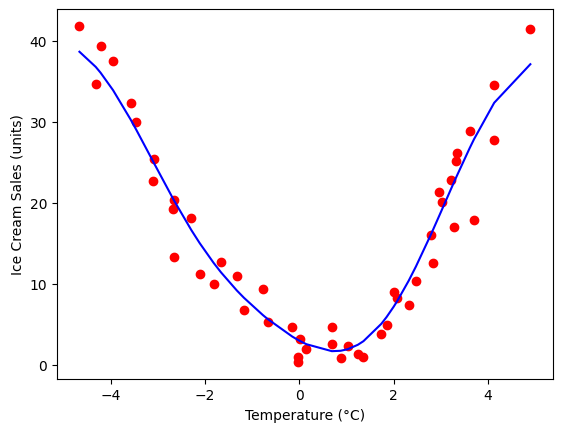

In [14]:
# X_grid = np.arange(min(X),max(y),0.1)
# X_grid = X_grid.reshape(-1,1)
plt.scatter(X,y, color='red')
plt.plot(X , sc_Y.inverse_transform(regressor.predict(X_scaled).reshape(-1,1)),color='blue' )
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.show()

In [15]:
## We Successfully Implemented SVR for Predeciting IceCreamSales using SVR